In [15]:
import pandas as pd

df = pd.read_csv(r'D:\FPTUniversity\Semester 8\DSP391m\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\vi_mo.csv')
df = df.drop(columns= 'Unnamed: 0')
df

,Thoi gian,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,1/2013,99.92,101.25,98.27,100.00
1,1/2014,99.94,100.69,98.18,82.65
2,1/2015,100.23,99.80,100.55,73.43
3,1/2016,100.18,100.00,99.77,44.75
4,1/2017,99.93,100.46,99.82,87.61
...,...,...,...,...,...
135,9/2019,99.89,100.32,103.25,73.62
136,9/2020,99.95,100.12,99.67,105.00
137,9/2021,99.52,99.38,100.00,209.52
138,9/2022,100.53,100.40,98.29,49.42


In [16]:
df['Thoi gian'] = pd.to_datetime(df['Thoi gian'], format='%m/%Y')

df_sorted = df.sort_values(by='Thoi gian', ascending=True)
df = df_sorted
df= df.reset_index(drop= True)




In [17]:
df = df.dropna()
df

,Thoi gian,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,2013-01-01,99.92,101.25,98.27,100.00
1,2013-02-01,100.03,101.32,99.67,73.56
2,2013-03-01,100.41,99.81,97.27,130.18
3,2013-04-01,100.01,100.02,97.44,84.07
4,2013-05-01,100.21,99.94,95.38,120.45
...,...,...,...,...,...
127,2023-08-01,100.57,100.88,100.64,106.70
128,2023-09-01,101.53,101.08,100.94,48.12
129,2023-10-01,101.20,100.08,100.92,60.00
130,2023-11-01,100.05,100.25,102.77,281.16


In [18]:
df.rename(columns= {'Thoi gian':'Date'}, inplace= True)
df

,Date,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,2013-01-01,99.92,101.25,98.27,100.00
1,2013-02-01,100.03,101.32,99.67,73.56
2,2013-03-01,100.41,99.81,97.27,130.18
3,2013-04-01,100.01,100.02,97.44,84.07
4,2013-05-01,100.21,99.94,95.38,120.45
...,...,...,...,...,...
127,2023-08-01,100.57,100.88,100.64,106.70
128,2023-09-01,101.53,101.08,100.94,48.12
129,2023-10-01,101.20,100.08,100.92,60.00
130,2023-11-01,100.05,100.25,102.77,281.16


In [19]:
vni_months = pd.read_csv(r'D:\FPTUniversity\Semester 8\DSP391m\VN-Index\Project\Data preprocessing\Data\Data_preprocessing\VN-Index-Month.csv')

vni_sorted = vni_months.sort_values(by='Date', ascending=True)
vni_months = vni_sorted
vni_months= vni_months.reset_index(drop= True)

filtered_df = vni_months[vni_months['Date'] < '2024-01-01']
vni_months = filtered_df.copy()
vni_months= vni_months.drop(columns='Year')

In [25]:
#vni_months['Low'] = vni_months['Low'].str.replace(',', '').astype(float)
# vni_months['Price'] = vni_months['Price'].str.replace(',', '').astype(float)
vni_months['High'] = vni_months['High'].str.replace(',', '').astype(float)
vni_months['Open'] = vni_months['Open'].str.replace(',', '').astype(float)
vni_months

,Date,Price,Open,High,Low,Vol.,Change %
0,2013-01-01,479.79,415.50,490.89,413.68,1.83M,15.97%
1,2013-02-01,474.56,477.11,497.87,459.64,1.15M,-1.09%
2,2013-03-01,491.04,476.51,500.59,461.61,1.05M,3.47%
3,2013-04-01,474.51,490.66,518.46,466.56,926.70K,-3.37%
4,2013-05-01,518.39,474.54,526.58,470.81,1.50M,9.25%
...,...,...,...,...,...,...,...
127,2023-08-01,1224.05,1222.90,1246.22,1149.13,24.11M,0.09%
128,2023-09-01,1154.15,1224.05,1255.11,1126.36,19.56M,-5.71%
129,2023-10-01,1028.19,1154.15,1161.48,1025.03,14.91M,-10.91%
130,2023-11-01,1094.13,1028.19,1132.75,1020.01,18.17M,6.41%


In [26]:
vni_months['Date'] = pd.to_datetime(vni_months['Date'])
df_full = pd.merge(vni_months, df, on='Date', how='inner')
df_full

,Date,Price,Open,High,Low,Vol.,Change %,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau
0,2013-01-01,479.79,415.50,490.89,413.68,1.83M,15.97%,99.92,101.25,98.27,100.00
1,2013-02-01,474.56,477.11,497.87,459.64,1.15M,-1.09%,100.03,101.32,99.67,73.56
2,2013-03-01,491.04,476.51,500.59,461.61,1.05M,3.47%,100.41,99.81,97.27,130.18
3,2013-04-01,474.51,490.66,518.46,466.56,926.70K,-3.37%,100.01,100.02,97.44,84.07
4,2013-05-01,518.39,474.54,526.58,470.81,1.50M,9.25%,100.21,99.94,95.38,120.45
...,...,...,...,...,...,...,...,...,...,...,...
127,2023-08-01,1224.05,1222.90,1246.22,1149.13,24.11M,0.09%,100.57,100.88,100.64,106.70
128,2023-09-01,1154.15,1224.05,1255.11,1126.36,19.56M,-5.71%,101.53,101.08,100.94,48.12
129,2023-10-01,1028.19,1154.15,1161.48,1025.03,14.91M,-10.91%,101.20,100.08,100.92,60.00
130,2023-11-01,1094.13,1028.19,1132.75,1020.01,18.17M,6.41%,100.05,100.25,102.77,281.16


In [98]:
# Đặt lại thứ tự các cột
df_full = df_full[['Date', 'Price', 'Open', 'High', 'Low', 'Chi so do la My', 'Chi so gia tieu dung', 'Chi so gia vang', 'Chi so dau', 'Vol.', 'Change %']]
df_full


,Date,Price,Open,High,Low,Chi so do la My,Chi so gia tieu dung,Chi so gia vang,Chi so dau,Vol.,Change %
0,2013-01-01,479.79,415.50,490.89,413.68,99.92,101.25,98.27,100.00,1.83M,15.97%
1,2013-02-01,474.56,477.11,497.87,459.64,100.03,101.32,99.67,73.56,1.15M,-1.09%
2,2013-03-01,491.04,476.51,500.59,461.61,100.41,99.81,97.27,130.18,1.05M,3.47%
3,2013-04-01,474.51,490.66,518.46,466.56,100.01,100.02,97.44,84.07,926.70K,-3.37%
4,2013-05-01,518.39,474.54,526.58,470.81,100.21,99.94,95.38,120.45,1.50M,9.25%
...,...,...,...,...,...,...,...,...,...,...,...
127,2023-08-01,1224.05,1222.90,1246.22,1149.13,100.57,100.88,100.64,106.70,24.11M,0.09%
128,2023-09-01,1154.15,1224.05,1255.11,1126.36,101.53,101.08,100.94,48.12,19.56M,-5.71%
129,2023-10-01,1028.19,1154.15,1161.48,1025.03,101.20,100.08,100.92,60.00,14.91M,-10.91%
130,2023-11-01,1094.13,1028.19,1132.75,1020.01,100.05,100.25,102.77,281.16,18.17M,6.41%


In [99]:
df_full['Date'] = pd.to_datetime(df_full['Date'])
filtered_df = df_full[df_full['Date'] < '2021-01-01']
test_df = df_full[df_full['Date'] > '2020-12-31']
print(test_df) 

          Date    Price     Open     High      Low  Chi so do la My  \
96  2021-01-01  1056.61  1113.77  1200.85   998.33            99.84   
97  2021-02-01  1168.47  1056.61  1185.58  1029.36            99.83   
98  2021-03-01  1191.44  1176.93  1200.94  1137.90           100.23   
99  2021-04-01  1239.39  1194.59  1286.32  1192.83           100.29   
100 2021-05-01  1328.05  1222.08  1328.05  1212.56            99.79   
101 2021-06-01  1408.55  1329.47  1419.61  1312.08            99.70   
102 2021-07-01  1310.05  1412.15  1424.28  1225.52           100.09   
103 2021-08-01  1331.47  1310.05  1379.70  1285.16            99.56   
104 2021-09-01  1342.06  1331.47  1365.92  1316.41            99.52   
105 2021-10-01  1444.27  1342.06  1447.62  1332.97            99.94   
106 2021-11-01  1478.44  1444.27  1511.68  1434.69            99.79   
107 2021-12-01  1498.28  1478.44  1499.77  1400.87           100.84   
108 2022-01-01  1478.96  1508.55  1536.45  1424.36            99.68   
109 20

In [100]:
cols_name = list(df_full)[2:9]
df_for_training = filtered_df[cols_name]
df_for_testing = test_df[cols_name]
print(df_for_training)


      Open     High     Low  Chi so do la My  Chi so gia tieu dung  \
0   415.50   490.89  413.68            99.92                101.25   
1   477.11   497.87  459.64           100.03                101.32   
2   476.51   500.59  461.61           100.41                 99.81   
3   490.66   518.46  466.56           100.01                100.02   
4   474.54   526.58  470.81           100.21                 99.94   
..     ...      ...     ...              ...                   ...   
91  796.86   888.44  796.47            99.93                100.07   
92  882.40   917.49  880.79            99.95                100.12   
93  910.13   970.15  897.72           100.07                100.09   
94  926.09  1012.50  924.14            99.95                 99.99   
95  988.71  1108.83  988.71            99.77                100.10   

    Chi so gia vang  Chi so dau  
0             98.27      100.00  
1             99.67       73.56  
2             97.27      130.18  
3             97.44    

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_testing_scaled = scaler.transform(df_for_testing)

In [102]:
import numpy as np

train_X = []
train_Y = []

n_future = 1
n_past = 12

for i in range(n_past, len(df_for_training_scaled) - n_future + 1):
    train_X.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    train_Y.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

train_X, train_Y = np.array(train_X), np.array(train_Y)

print('trainX shape == {}.'.format(train_X.shape))
print('trainY shape == {}.'.format(train_Y.shape))

trainX shape == (84, 12, 7).
trainY shape == (84, 1).


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(train_Y.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 64)            18432     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30881 (120.63 KB)
Trainable params: 30881 (120.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
5/5 [==============================] - 2s 67ms/step - loss: 0.8618 - val_loss: 0.4986
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 0.5797 - val_loss: 0.3363
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.3576 - val_loss: 0.2695
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.2410 - val_loss: 1.0023
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.3544 - val_loss: 0.5384
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1704 - val_loss: 0.3413
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1655 - val_loss: 0.3659
Epoch 8/10
5/5 [==============================] - 0s 11ms/step - loss: 0.1344 - val_loss: 0.5837
Epoch 9/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1198 - val_loss: 0.7663
Epoch 10/10
5/5 [==============================] - 0s 10ms/step - loss: 0.1375 - val_loss: 0.8444


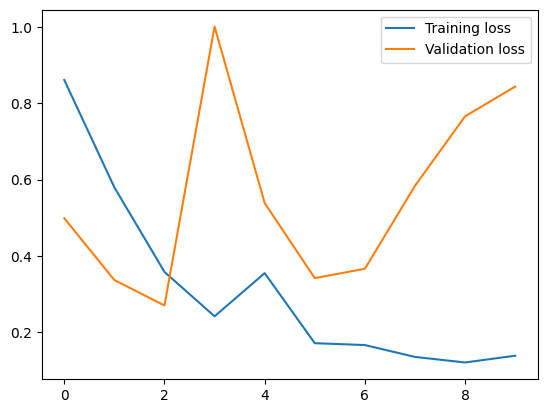

In [104]:
import matplotlib.pyplot as plt 

history = model.fit(train_X, train_Y, epochs=10, batch_size=16, validation_split=0.15, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


In [105]:
test_X = []
test_Y = []

n_future = 1
n_past = 12

for i in range(n_past, len(df_for_testing_scaled) - n_future + 1):
    test_X.append(df_for_testing_scaled[i - n_past:i, 0:df_for_testing.shape[1]])
    test_Y.append(df_for_testing_scaled[i + n_future - 1:i + n_future, 0])

test_X, test_Y = np.array(test_X), np.array(test_Y)

print('testX shape == {}.'.format(test_X.shape))
print('testY shape == {}.'.format(test_Y.shape))

testX shape == (24, 12, 7).
testY shape == (24, 1).


In [106]:
prediction = model.predict(test_X)
#prediction = model.predict(train_X)
prediction_copies = np.repeat(prediction, df_for_testing.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:, 0]

1/1 [==============================] - 0s 186ms/step


In [107]:
test_Y_copies = np.repeat(test_Y, df_for_testing.shape[1], axis=-1)
test_Y_inverse = scaler.inverse_transform(test_Y_copies)[:, 0]

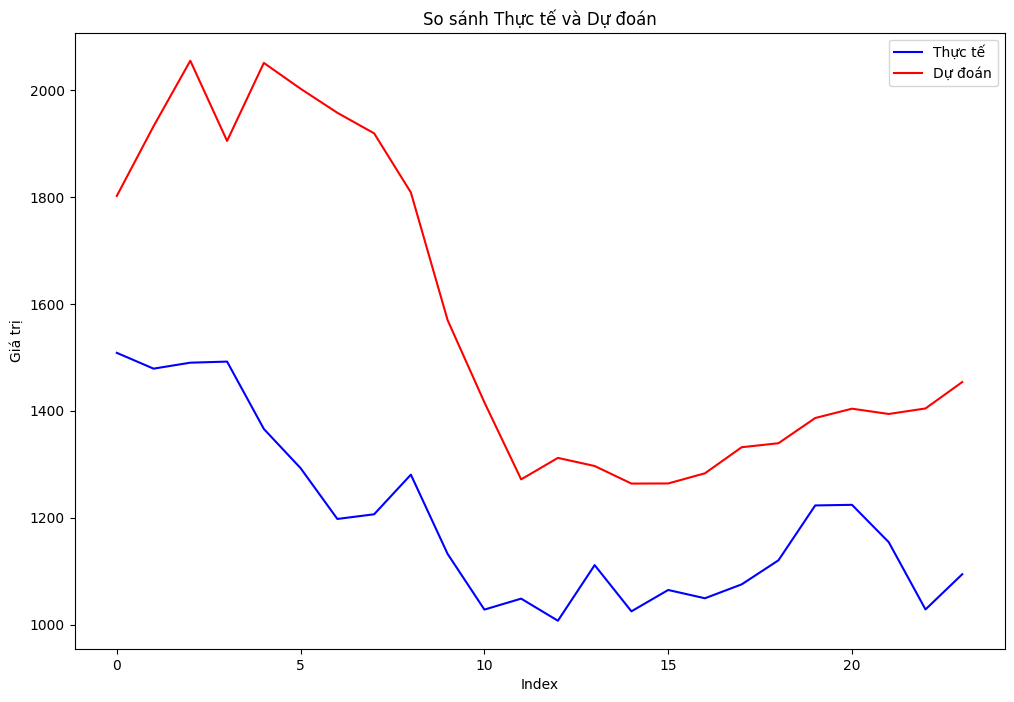

In [108]:
test_Y_draw = test_Y_inverse.flatten()
prediction_draw = y_pred_future.flatten()


plt.figure(figsize=(12,8))
# Tạo các chỉ số (x-axis)
x = np.arange(len(test_Y_draw))

# Vẽ biểu đồ
plt.plot(x, test_Y_draw, label='Thực tế', color='b')
plt.plot(x, prediction_draw, label='Dự đoán', color='r')

# Thêm nhãn và tiêu đề
plt.xlabel('Index')
plt.ylabel('Giá trị')
plt.title('So sánh Thực tế và Dự đoán')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [109]:
rmse = np.sqrt(np.mean(((prediction - test_Y) ** 2)))
mae = np.mean(np.abs(prediction - test_Y))
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 2.1796727602563757
MAE: 1.9602029235020275


In [82]:
def rmse(pred, test):
    return np.sqrt(np.mean(((pred - test) ** 2)))

In [88]:
test_X.shape

(24, 12, 6)

1/1 [==============================] - 0s 21ms/step


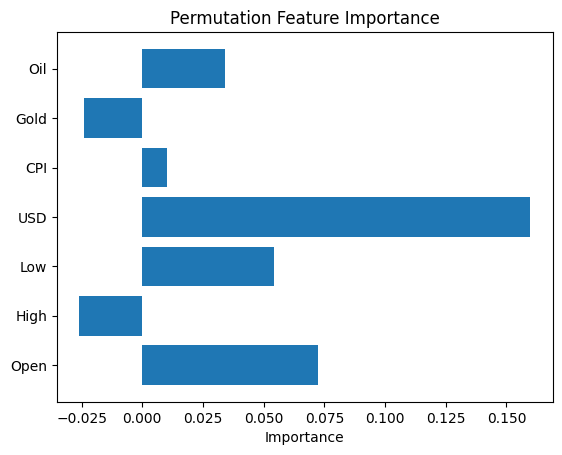

In [111]:

def rmse(pred, test):
    return np.sqrt(np.mean((pred - test) ** 2))

def permutation_importance(model, X_test, y_test):
    # Dự đoán ban đầu và tính toán RMSE
    baseline_pred = model.predict(X_test)
    baseline_rmse = rmse(baseline_pred, y_test)

    importances = []
    
    for i in range(X_test.shape[2]):  # X_test.shape[2] là số lượng features (6)
        # Lưu giá trị của feature i
        save_col = X_test[:, :, i].copy()  # Lưu lại các giá trị của feature i
        
        # Hoán đổi giá trị ngẫu nhiên cho feature i
        for j in range(X_test.shape[0]):  # Lặp qua từng mẫu
            np.random.shuffle(X_test[j, :, i])  # Hoán đổi ngẫu nhiên cho từng mẫu
        
        # Dự đoán với dữ liệu đã bị hoán đổi
        shuffled_pred = model.predict(X_test)
        mse = rmse(shuffled_pred, y_test)

        # Tính tầm quan trọng
        importances.append(baseline_rmse - mse)

        # Khôi phục lại dữ liệu
        X_test[:, :, i] = save_col
        
    return importances

# Tính toán tầm quan trọng của các feature
importances = permutation_importance(model, test_X, test_Y)

# Vẽ biểu đồ tầm quan trọng
feature_names = ['Open', 'High', 'Low', 'USD', 'CPI', 'Gold', 'Oil']
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.title('Permutation Feature Importance')
plt.show()


In [73]:
from statsmodels.tsa.arima.model import ARIMA


model_arima = ARIMA(df_full['Price'], order= (2, 1, 2))
model_fit = model_arima.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -709.973
Date:                Sun, 27 Oct 2024   AIC                           1429.946
Time:                        20:27:01   BIC                           1444.322
Sample:                             0   HQIC                          1435.788
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6525      4.232      0.154      0.877      -7.641       8.946
ar.L2          0.0643      2.250      0.029      0.977      -4.345       4.474
ma.L1         -0.5814      4.235     -0.137      0.8

In [ ]:
# Tách dữ liệu train và test
size = int(len(df_full) - 30)
train, test = df_full['Price'][0:size], df_full['Price'][size:len(df_full)]

print('\t ARIMA MODEL : In- Sample Forecasting \n')

# Chuẩn bị dữ liệu cho mô hình
history = [x for x in train]
predictions = []

# Dự đoán cho mỗi điểm dữ liệu trong tập test
for t in range(len(test)):
    
    # Xây dựng và huấn luyện mô hình ARIMA
    model = ARIMA(history, order=(2,1,2))
    model_fit = model.fit()
    
    # Dự đoán giá trị tiếp theo
    output = model_fit.forecast()
    yhat = output[0]  # Lấy giá trị dự đoán đầu tiên
    predictions.append(yhat)
    
    # Lấy giá trị thực tế từ tập test
    obs = test.iloc[t]
    history.append(obs)  # Thêm giá trị thực tế vào history để sử dụng cho dự đoán tiếp theo
    
    # In kết quả dự đoán
    print(f'predicted = {yhat}')
    print(f'expected = {obs}')


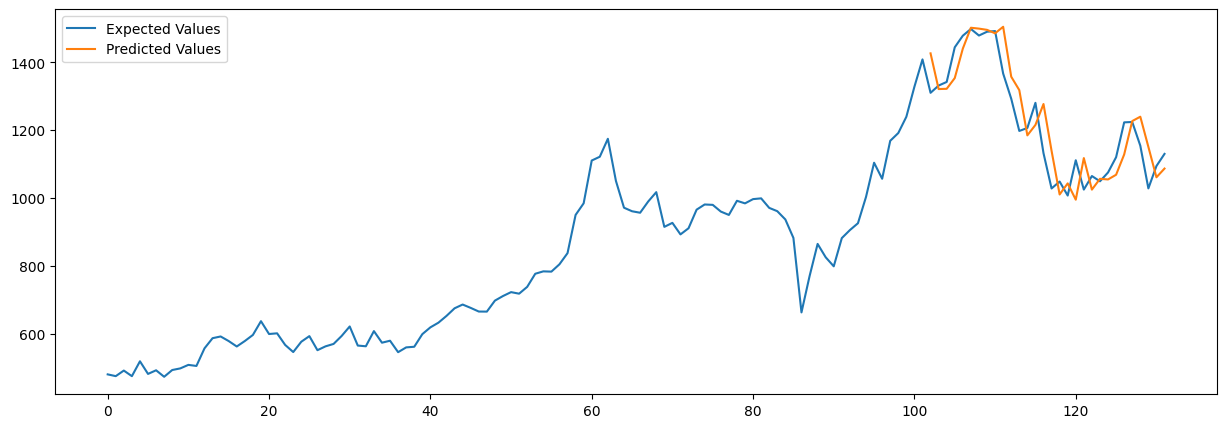

In [75]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df_full['Price'],label = 'Expected Values')
plt.plot(predictions_series,label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [76]:
rmse_arima = np.sqrt(np.mean(((predictions - test) ** 2)))
mae_arima = np.mean(np.abs(predictions - test))
print(f'RMSE_arima: {rmse_arima}')
print(f'MAE_arima: {mae_arima}')


RMSE_arima: 73.91835801063971
MAE_arima: 58.75277993242663


In [80]:
models = ['LSTM', 'ARIMA']  # Tên của các mô hình bạn đang sử dụng
mae_values = []
rmse_values = []

mae_values.append(mae)
mae_values.append(mae_arima)
rmse_values.append(rmse)
rmse_values.append(rmse_arima)



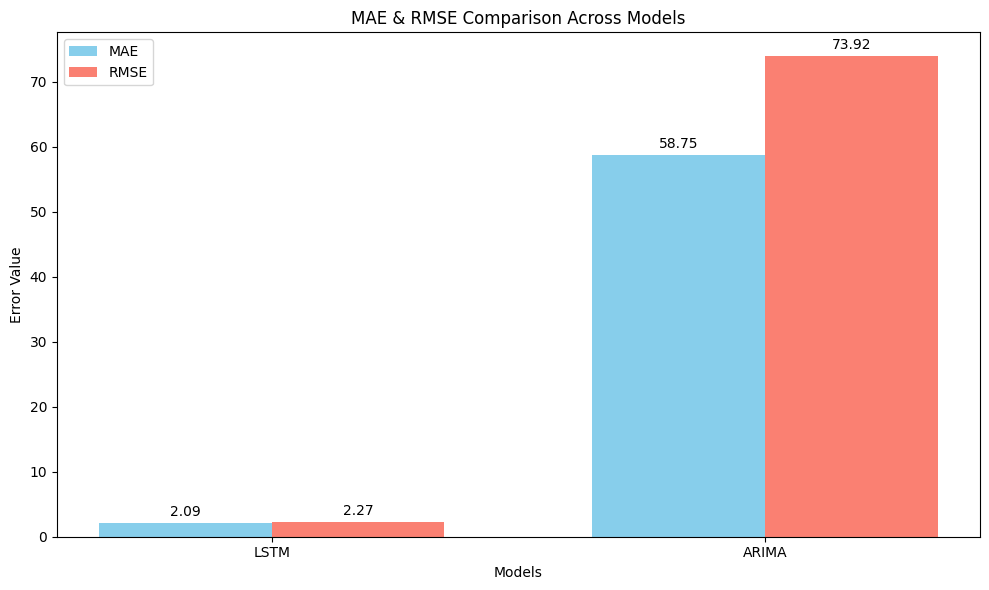

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Vẽ biểu đồ MAE và RMSE
x = np.arange(len(models))  # Vị trí x cho mỗi mô hình
width = 0.35  # Độ rộng của mỗi cột

fig, ax = plt.subplots(figsize=(10, 6))

# Vẽ biểu đồ thanh cho MAE và RMSE
bars1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='skyblue')
bars2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon')

# Thêm nhãn và tiêu đề
ax.set_xlabel('Models')
ax.set_ylabel('Error Value')
ax.set_title('MAE & RMSE Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Thêm giá trị lên trên các cột
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()
